(14410, 11)
False    13687
True       723
Name: is_goal, dtype: int64
           period        time   distance      angle  is_rebound  \
is_goal                                                           
False    2.000219  603.396983  13.727369  56.687283    0.050851   
True     2.022130  610.058506   9.006916  55.974842    0.195021   

         is_pass_before  is_cross_line  is_one_touch  is_fast_attack  
is_goal                                                               
False          0.169358       0.169431      0.252210        0.139841  
True           0.236515       0.280775      0.461964        0.091286  
Optimization terminated successfully.
         Current function value: 0.187252
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.059     
Dependent Variable: is_goal          AIC:              5414.6033 
Date:               2019-01-21 18:30 BIC:              5482.7844 
No. Observations:   14410            

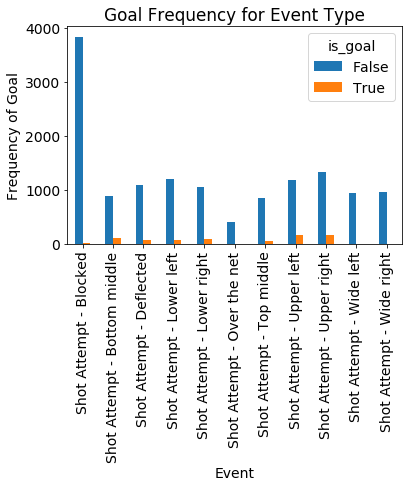

Accuracy of Logistic Regression on Test Set: 0.95
The Confusion Matrix is:
[[4108    0]
 [ 215    0]]
              precision    recall  f1-score   support

       False       0.95      1.00      0.97      4108
        True       0.00      0.00      0.00       215

   micro avg       0.95      0.95      0.95      4323
   macro avg       0.48      0.50      0.49      4323
weighted avg       0.90      0.95      0.93      4323



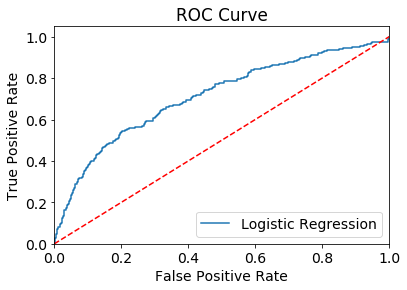

In [5]:
#############################################################################################################################################
# XG_Model.py
# Author(s): Kevin Clark
# Version 1.0
# Description: This is an attempt to create a logistic regression model for expected goals given statistics on NHL Shots. 
# Logisitic regression was chosen because logistic regression is effective when the dependent variable is a discrete(categorical) value.
# Due to a relatively small number of features, logistic regression is a computationally efficient algorithm to use.
# Dependencies:
#############################################################################################################################################

# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import statsmodels.api as sm

# If there are warnings, I want to ignore them for now. 
import warnings
warnings.filterwarnings('ignore')

# Import and Format Data 
data = pd.read_csv('shots.csv')
data = data.dropna()

# Printed out data shape for analysis.
print(data.shape)

# Set features and target variables
x = data[['period', 'time', 'distance', 'angle', 'is_rebound', 'is_pass_before', 'is_cross_line', 'is_one_touch', 'is_fast_attack']]
y = data[['is_goal']]

# Print out means to take a closer look at the data.
print(data['is_goal'].value_counts())
print(data.groupby('is_goal').mean())

# Uses statsmodel library to create a logistic regression
logit_model=sm.Logit(y.astype(float),x.astype(float))
result=logit_model.fit()
print(result.summary2())

# Curious to see if event type has affect on goals. It seems like Upper Left and Upper Right have the greatest occurences of a goal.
pd.crosstab(data.event, data.is_goal).plot(kind='bar')
plt.title('Goal Frequency for Event Type')
plt.xlabel('Event')
plt.ylabel('Frequency of Goal')
plt.show()

# Implement a logistic regression model.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

# Test the model. 
y_predict = log_reg.predict(x_test)
print('Accuracy of Logistic Regression on Test Set: {:.2f}'.format(log_reg.score(x_test, y_test)))
confusion_matrix = confusion_matrix(y_test, y_predict)

# Calculate confusion matrix and f-score
print('The Confusion Matrix is:')
print(confusion_matrix)
print(classification_report(y_test, y_predict))

log_roc_auc = roc_auc_score(y_test, log_reg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()